In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22419


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22414,2021-05-02,47,沖縄県,57,12625,0,137
22415,2021-05-03,47,沖縄県,57,12682,0,137
22416,2021-05-04,47,沖縄県,33,12715,0,137
22417,2021-05-05,47,沖縄県,63,12778,0,137
22418,2021-05-06,47,沖縄県,39,12817,0,137


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10494,6669,123
43,香川県,17649,1382,23
44,高知県,18603,1106,20
45,鳥取県,14787,383,2
46,鹿児島県,21942,2403,28


## 人口データを付与

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [5]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口
0,三重県,11448,3990,88,1813859
1,京都府,12402,13292,191,2545899
2,佐賀県,19557,1776,14,823810
3,兵庫県,13356,33860,725,5549568
4,北海道,477,25524,883,5267762


## 人口当たりの感染者数

In [6]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口,１万人当たりの感染者数
4,北海道,477,25524,883,5267762,48.453214
41,青森県,954,1701,24,1275783,13.332988
19,岩手県,1431,1039,33,1235517,8.409435
11,宮城県,1908,8223,71,2292385,35.870938
36,秋田県,2385,542,9,985416,5.500215
15,山形県,2862,1577,35,1082296,14.570875
35,福島県,3339,3646,126,1881981,19.373203
38,茨城県,3816,8410,135,2921436,28.787213
27,栃木県,4293,5484,71,1965516,27.901070
37,群馬県,4770,6407,104,1969439,32.532107


## 感染者数

### 平均値、中央値

In [7]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      13170.765957
std       25629.603669
min         366.000000
25%        1738.500000
50%        3984.000000
75%        8316.500000
max      143534.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [8]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口,１万人当たりの感染者数
0,東京都,6201,143534,1903,13834925,103.747581
1,大阪府,12879,86645,1605,8849635,97.907993
2,神奈川県,6678,54868,825,9209442,59.577985
3,埼玉県,5247,39051,747,7390054,52.842645
4,愛知県,10971,35261,643,7575530,46.545918
5,千葉県,5724,33975,628,6319772,53.759851
6,兵庫県,13356,33860,725,5549568,61.013758
7,北海道,477,25524,883,5267762,48.453214
8,福岡県,19080,25314,364,5129841,49.346559
9,京都府,12402,13292,191,2545899,52.209455


## １万人あたりの感染者数

### 平均値、中央値

In [9]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      30.246686
std       22.945971
min        5.387709
25%       15.034625
50%       21.997300
75%       41.208428
max      103.747581
Name: １万人当たりの感染者数, dtype: float64

## グラフ化

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [11]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)


<IPython.core.display.Javascript object>


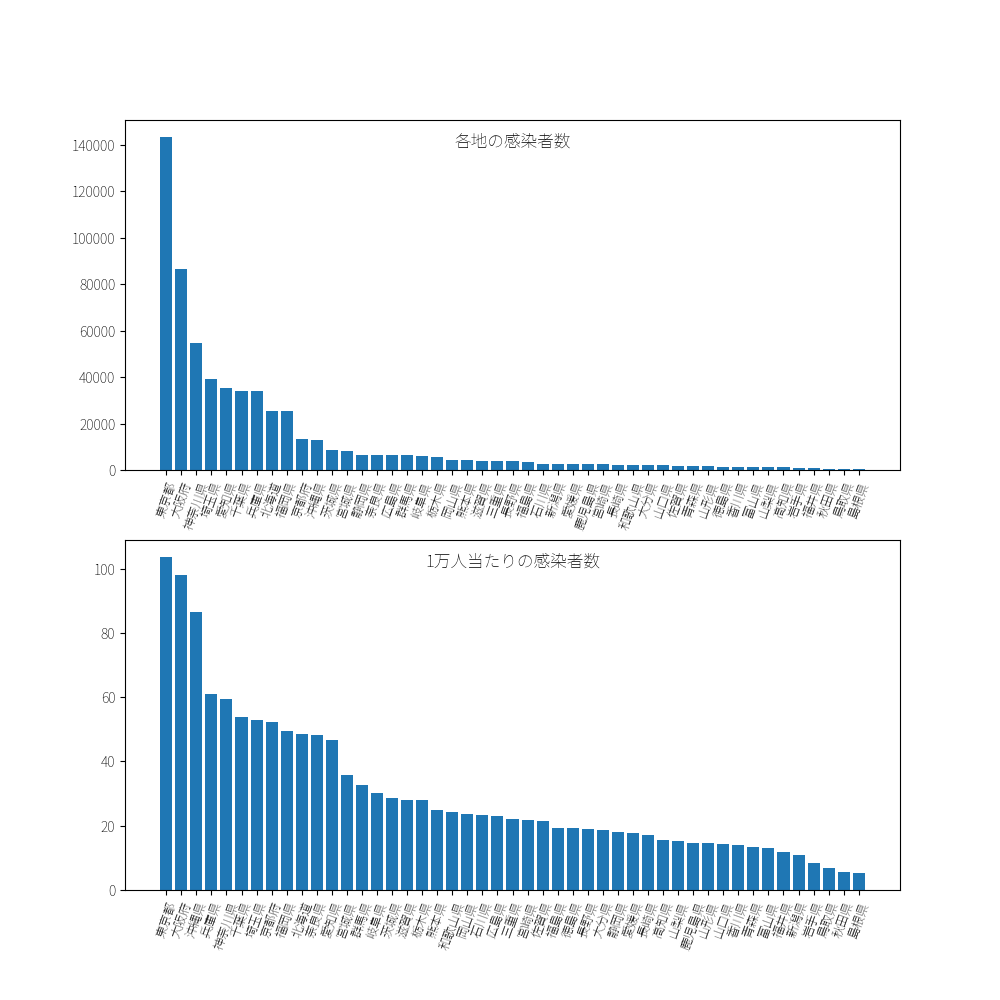

Text(0.5, 0.9, '1万人当たりの感染者数')

In [12]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


## 度数分布表

In [13]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  5  1  1  1  0  0  1]
[   366.  18262.  36158.  54054.  71950.  89846. 107742. 125638. 143534.]


## ヒストグラム

<IPython.core.display.Javascript object>


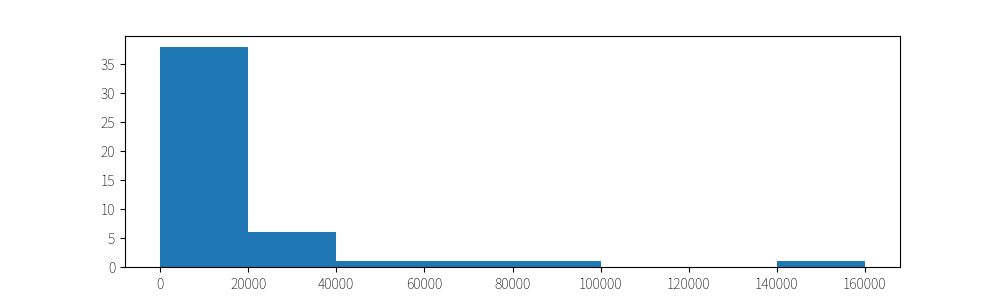

(array([38.,  6.,  1.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [14]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


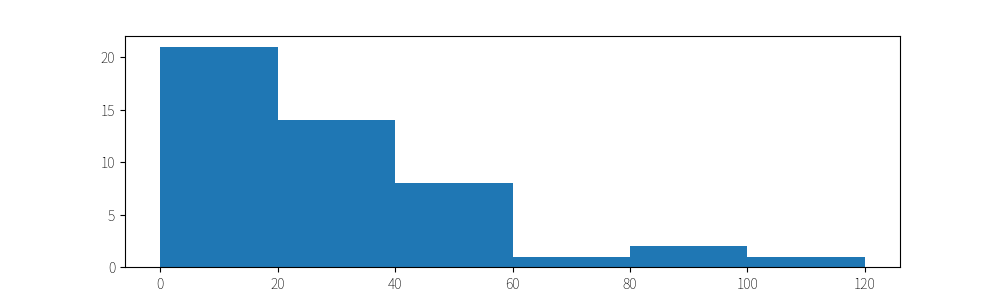

(array([21., 14.,  8.,  1.,  2.,  1.]),
 array([  0,  20,  40,  60,  80, 100, 120]),
 <a list of 6 Patch objects>)

In [15]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["１万人当たりの感染者数"],bins=[0,20,40,60,80,100,120])